In [1]:
import tensorflow as tf
from sklearn.datasets import load_sample_images

In [2]:
# load sample images
images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [3]:
# there are two images of three colors
images.shape

TensorShape([2, 70, 120, 3])

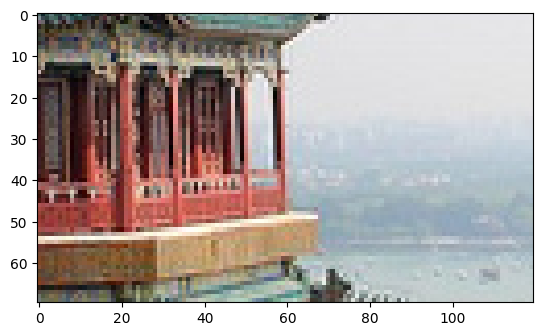

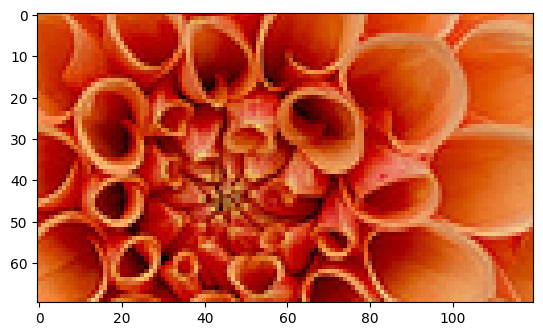

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[0, :, :])
plt.show()
plt.imshow(images[1, :, :])

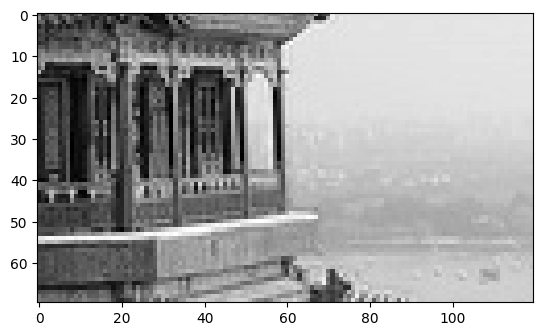

In [5]:
plt.imshow(images[0, :, :, 1], cmap="gray")
plt.show()

In [9]:
# create 32 filters, initialized randomly and apply them
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation="relu", kernel_initializer="he_normal") # Try
fmaps = conv_layer(images)

In [10]:
fmaps.shape

TensorShape([2, 64, 114, 32])

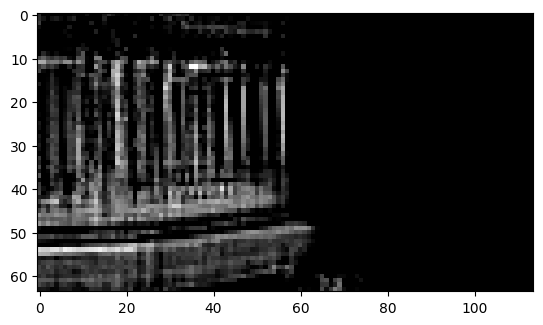

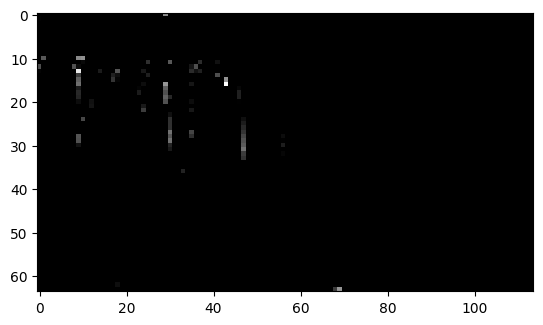

In [11]:
plt.imshow(fmaps[0, :, :, 0], cmap="gray")
plt.show()
plt.imshow(fmaps[0, :, :, 30], cmap="gray")
plt.show()

In [12]:
#look at filter dimensions
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [13]:
biases.shape

(32,)

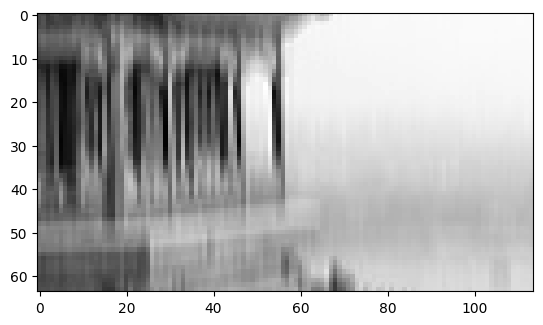

In [14]:
# define a new filter that has 1 along a vertical line
import numpy as np
filters = np.zeros([7, 7, 3, 1])
filters[:, 3, :, 0] = 1
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="VALID") + biases  #also try padding="SAME"
plt.imshow(fmaps[0, :, :, 0], cmap="gray")
